In [14]:
install.packages("dplyr")
library(ggplot2)
library(glue)
library(MASS)
library(dplyr)
library(glmnet)
library(bigstep)
library(SLOPE)



The downloaded binary packages are in
	/var/folders/zf/z_5ht60d3n7gfsmz14cjq6fc0000gn/T//RtmpOwj4no/downloaded_packages


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.1-8



In [15]:
# project 1
gene_expression  = get(load("Lab3.Rdata"))
standardized_genes <- t(apply(gene_expression, 1, function(x) {
    (x - mean(x)) / sd(x)
}))
head(standardized_genes)

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,1.543700,-0.8136279,-0.63442403,0.0250797661,0.1797980,-0.21320842,0.32554779,0.33642683,1.3851350,1.975775,⋯,0.19797392,-0.60909366,-0.8904307,-0.7792694,-0.8804287,1.2385920,-0.978905529,0.7745010,1.5155365,0.1430975
NA06993,1.379893,-0.7178879,-0.09136441,0.4052641825,0.5367274,-0.30778614,0.39479114,0.08371120,0.8895464,1.346209,⋯,0.26646277,-0.51302174,-1.3754314,-1.1107829,-0.5686128,0.9495139,-0.270315914,0.7942432,0.8078035,-0.3829534
NA07022,1.438081,-0.6006803,-0.08394002,0.0001899472,0.6539953,-0.59627018,0.68631928,0.07004591,1.2487015,2.038646,⋯,-0.33546705,0.02284704,-1.0363154,-0.6410519,-0.2167788,0.9598225,-0.272151126,0.5970845,1.2267982,-0.5389261
NA07034,1.489181,-0.4520390,-0.35744462,0.2717351578,0.6833310,-0.13750907,0.72519681,0.38010935,0.9528681,1.903886,⋯,-0.46328034,-0.12128450,-0.9122458,-0.6895398,-0.3122274,0.6902553,-0.615244392,0.1035161,1.0464362,-0.6447329
NA07055,1.650934,-0.5417405,0.18789621,0.2814621598,0.4975862,-0.64284033,0.25429681,0.39894017,0.6609621,1.655420,⋯,-0.05050971,-0.25408286,-1.0810093,-1.0059990,-0.5704555,0.8295987,-0.194014618,0.5927771,0.8747763,-0.1914374
NA07056,1.311004,-0.9340028,-0.29942111,0.1113627835,-0.1728013,0.04260929,-0.07232948,0.30667950,1.1809229,1.779113,⋯,-0.08639086,-0.11126795,-0.5098959,-0.3801591,-0.1664537,1.0971042,-0.002270544,1.0796663,1.3027283,0.6946147


In [16]:
# P1 b
data <- standardized_genes - 10
head(data)

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,-8.456300,-10.81363,-10.634424,-9.974920,-9.820202,-10.213208,-9.674452,-9.663573,-8.614865,-8.024225,⋯,-9.802026,-10.609094,-10.89043,-10.77927,-10.88043,-8.761408,-10.97891,-9.225499,-8.484464,-9.856902
NA06993,-8.620107,-10.71789,-10.091364,-9.594736,-9.463273,-10.307786,-9.605209,-9.916289,-9.110454,-8.653791,⋯,-9.733537,-10.513022,-11.37543,-11.11078,-10.56861,-9.050486,-10.27032,-9.205757,-9.192196,-10.382953
NA07022,-8.561919,-10.60068,-10.083940,-9.999810,-9.346005,-10.596270,-9.313681,-9.929954,-8.751298,-7.961354,⋯,-10.335467,-9.977153,-11.03632,-10.64105,-10.21678,-9.040177,-10.27215,-9.402915,-8.773202,-10.538926
NA07034,-8.510819,-10.45204,-10.357445,-9.728265,-9.316669,-10.137509,-9.274803,-9.619891,-9.047132,-8.096114,⋯,-10.463280,-10.121284,-10.91225,-10.68954,-10.31223,-9.309745,-10.61524,-9.896484,-8.953564,-10.644733
NA07055,-8.349066,-10.54174,-9.812104,-9.718538,-9.502414,-10.642840,-9.745703,-9.601060,-9.339038,-8.344580,⋯,-10.050510,-10.254083,-11.08101,-11.00600,-10.57046,-9.170401,-10.19401,-9.407223,-9.125224,-10.191437
NA07056,-8.688996,-10.93400,-10.299421,-9.888637,-10.172801,-9.957391,-10.072329,-9.693321,-8.819077,-8.220887,⋯,-10.086391,-10.111268,-10.50990,-10.38016,-10.16645,-8.902896,-10.00227,-8.920334,-8.697272,-9.305385


In [17]:
# P1 c
data_subset <- data[1:5, ]
MLE_means <- colMeans(data_subset)
mean <- colMeans(data[6:210,])
k <- ncol(data)
norm_x_squared <- sum(MLE_means^2)
shrinkage_factor <- (k - 2) / norm_x_squared
JS_shrink_zero <- (1 - shrinkage_factor) * MLE_means
n <- nrow(data_subset)
sigma2 <- var(as.vector(data_subset))  # estimate of σ^2
JS_shrink_common <- (1 - (sigma2 * (n-3) / sum((MLE_means - mean)^2))) * MLE_means + (sigma2 * (n-3) / sum((MLE_means - mean)^2)) * mean

Squared Error for MLE: 7.474385 
Squared Error for James-Stein Zero: 10.3338 
Squared Error for James-Stein Common Mean: 4.017367 


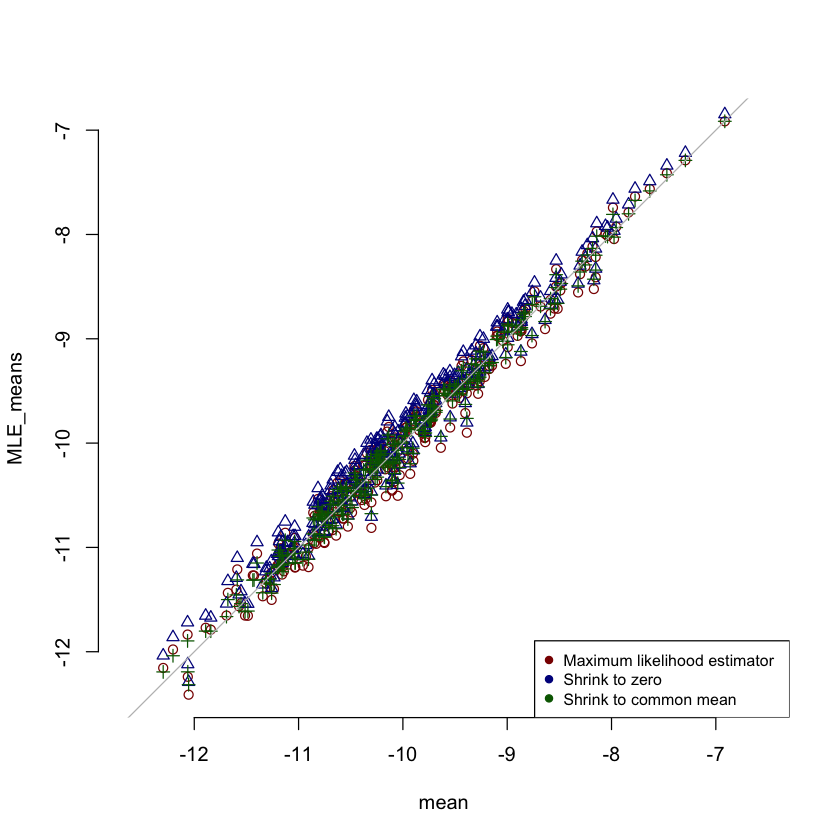

In [18]:
# P1 d
squared_error_MLE <- sum((mean - MLE_means)^2)
squared_error_JS_zero <- sum((mean-JS_shrink_zero )^2)
squared_error_JS_common <- sum((mean-JS_shrink_common)^2)

cat("Squared Error for MLE:", squared_error_MLE, "\n")
cat("Squared Error for James-Stein Zero:", squared_error_JS_zero, "\n")
cat("Squared Error for James-Stein Common Mean:", squared_error_JS_common, "\n")

par(bg = "white")

plot(mean, MLE_means, col = "darkred", asp = 1, frame = FALSE, pch=1)
points(mean, JS_shrink_zero, col = "darkblue", pch=2)
points(mean, JS_shrink_common, col = "darkgreen", pch=3)
abline(0, 1, col = "gray")

legend(
  "bottomright",
  legend = c("Maximum likelihood estimator", "Shrink to zero", "Shrink to common mean"),
  col = c("darkred", "darkblue", "darkgreen"),
  pch = 19,
  cex = 0.8
)


In [19]:
# Project 1.2

n <- 1000
p <- 950
sigma <- sqrt(1/n)
model_sizes <- c(2, 5, 10, 100, 500, 950)

all_results <- vector("list", length(model_sizes))
names(all_results) <- paste("Model", model_sizes, "vars")

analyze_model <- function(num_vars) {
  X <- matrix(rnorm(n * num_vars, mean = 0, sd = sqrt(1/n)), nrow = n, ncol = num_vars)
  actual_beta_size <- min(num_vars, 5)
  beta <- c(rep(3, actual_beta_size), rep(0, num_vars - actual_beta_size))
  
  epsilon <- rnorm(n, mean = 0, sd = 1)
  Y <- X %*% beta + epsilon

  fit <- lm(Y ~ X - 1)
  # rss
  residuals <- residuals(fit)
  rss <- sum(residuals^2)

  # unbiased sigma^2
  sigma_hat_sq <- rss / (n - num_vars)
  pe <- sum((X %*% (beta - coef(fit)) + rnorm(n))^2) + n * sigma^2
  sigma_pe <- n * sigma_hat_sq

  # LOOCV
  hat_values <- hatvalues(fit)
  loocv_pe <- sum((residuals / (1 - hat_values))^2)

  c(RSS = rss, RSS_PE = pe, Sigma_PE = sigma_pe, LOOCV_PE = loocv_pe)
}

In [20]:
results <- lapply(c(2, 5, 10, 100, 500, 950), analyze_model)
results

[[1]]
      RSS    RSS_PE  Sigma_PE  LOOCV_PE 
1011.7729  990.5217 1013.8005 1015.8704 

[[2]]
     RSS   RSS_PE Sigma_PE LOOCV_PE 
1061.503 1010.071 1066.838 1071.979 

[[3]]
      RSS    RSS_PE  Sigma_PE  LOOCV_PE 
 963.0750 1079.2732  972.8030  982.5416 

[[4]]
      RSS    RSS_PE  Sigma_PE  LOOCV_PE 
 925.6413 1001.2856 1028.4903 1142.4090 

[[5]]
      RSS    RSS_PE  Sigma_PE  LOOCV_PE 
 544.7088 1491.2568 1089.4176 2186.0204 

[[6]]
        RSS      RSS_PE    Sigma_PE    LOOCV_PE 
   35.68933  2004.36810   713.78664 15007.81089

In [21]:
# repeat 30 times
results_list <- lapply(model_sizes, function(size) {
  results <- replicate(30, analyze_model(size), simplify = FALSE)
  results_df <- do.call(rbind, results) %>% as.data.frame()
  names(results_df) <- c("RSS","RSS_PE", "Sigma_PE", "LOOCV_PE")
  results_df$Model <- paste("Model", size, "vars")
  results_df
})

In [22]:
average_results_list <- lapply(results_list, function(df) {
  averages <- colMeans(df[sapply(df, is.numeric)])
  model <- unique(df$Model) 
  c(averages, Model = model)
})

average_results_df <- do.call(rbind, lapply(average_results_list, function(x) as.data.frame(t(x))))
average_results_df <- average_results_df %>%
  select(Model, everything())

print(average_results_df)

           Model              RSS           RSS_PE         Sigma_PE
1   Model 2 vars 993.378750980706 996.888411112584 995.369489960627
2   Model 5 vars 993.248090531487 1004.07018949453 998.239286966319
3  Model 10 vars 987.930167009705 1021.43650980436 997.909259605762
4 Model 100 vars 895.518416116815 1109.93788664351 995.020462352016
5 Model 500 vars  501.32506627271 1520.74465430041 1002.65013254542
6 Model 950 vars 49.6195827473976 1932.70181403507 992.391654947952
          LOOCV_PE
1 997.368779579137
2 1003.32361707504
3 1007.98060164232
4 1105.59602788259
5 2008.33924100161
6 20640.8448006012


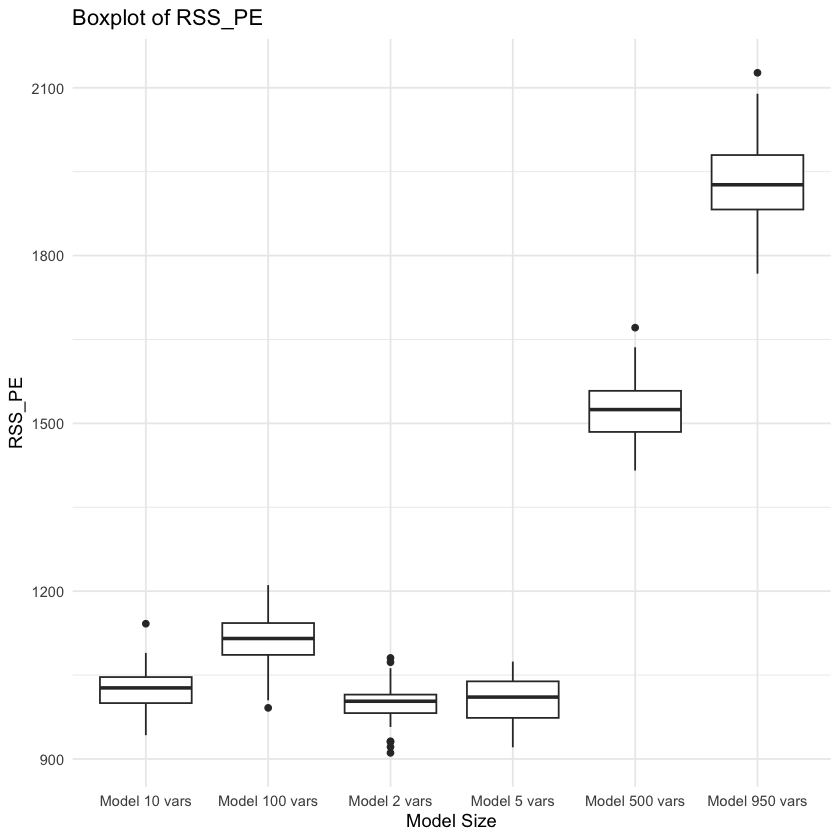

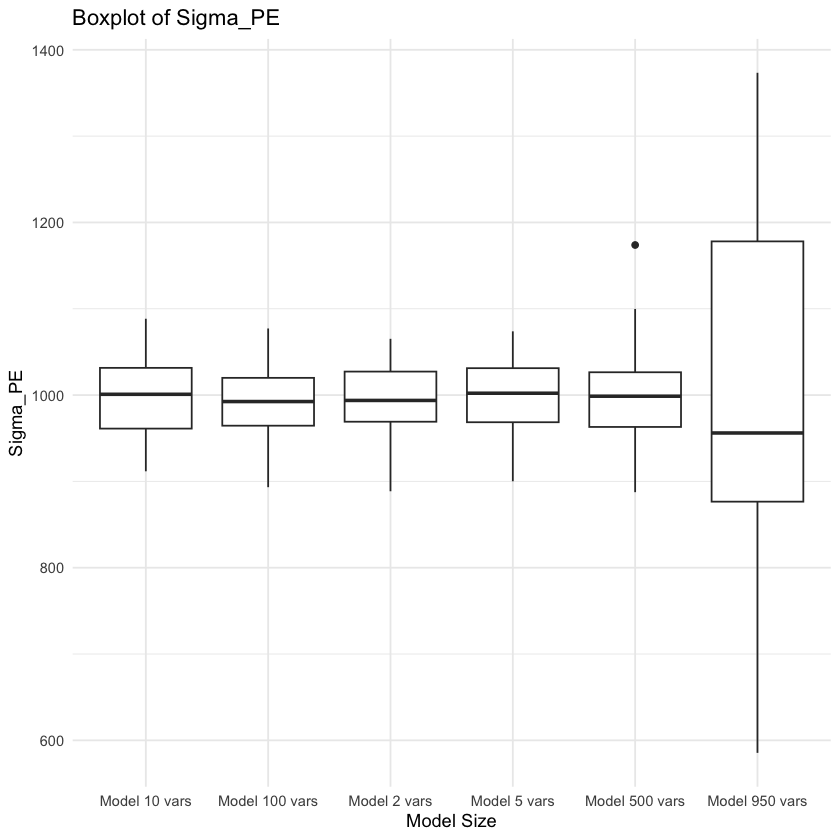

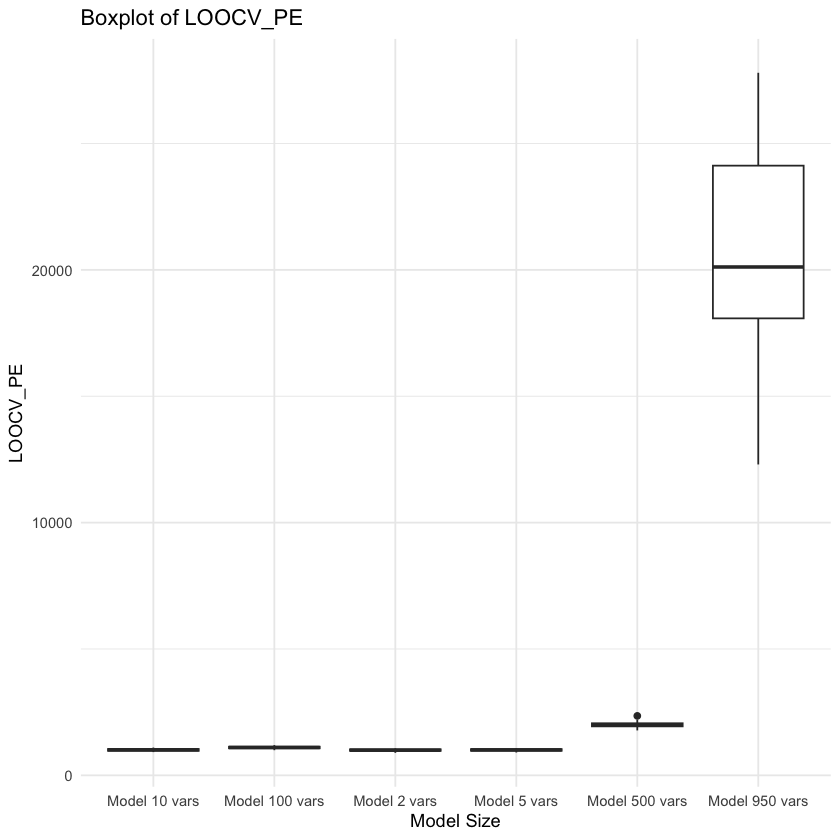

In [23]:
average_results_df <- do.call(rbind, results_list)
ggplot(average_results_df, aes(x = Model, y = RSS_PE)) +
  geom_boxplot() +
  labs(title = "Boxplot of RSS_PE", y = "RSS_PE", x = "Model Size") +
  theme_minimal()

ggplot(average_results_df, aes(x = Model, y = Sigma_PE)) +
  geom_boxplot() +
  labs(title = "Boxplot of Sigma_PE", y = "Sigma_PE", x = "Model Size") +
  theme_minimal()

ggplot(average_results_df, aes(x = Model, y = LOOCV_PE)) +
  geom_boxplot() +
  labs(title = "Boxplot of LOOCV_PE", y = "LOOCV_PE", x = "Model Size") +
  theme_minimal()

In [24]:
# Project 2
n <- 1000
p <- 950
sigma <- 1 / sqrt(n)
k <- 20

X <- matrix(rnorm(n * p, mean = 0, sd = sigma), nrow = n, ncol = p)
beta <- c(rep(6, k), rep(0, p - k))
epsilon <- rnorm(n, mean = 0, sd = 1)

Y <- X %*% beta + epsilon

In [25]:


big = prepare_data(Y, X)
mbic2 = stepwise(big, crit = mbic2)
beta.mbic2 <- coef(mbic2$final_model)

cv.ridge <- cv.glmnet(X, Y, alpha = 0)
beta.ridge <- coef(cv.ridge, s = "lambda.min")

cv.lasso <- cv.glmnet(X, Y, alpha = 1)
beta.lasso.1se <- coef(cv.lasso, s = "lambda.1se")
beta.lasso.min <- coef(cv.lasso, s = "lambda.min")

# LASSO with specified lambda
lambda <- qnorm(1 - 0.1 / (2 * p)) / n
lasso.specified <- glmnet(X, Y, alpha = 1, lambda = lambda)
beta.lasso.specified <- coef(lasso.specified)

slope <- SLOPE(X, Y, lambda = qnorm(1 - seq(1, p, 1)*0.1/2/p)/n)
beta.slope <- coef(slope)[,20][-1]

Starting stepwise, 0 variables, crit = 555.87, MSE = 1.743.

Variable 9 added with crit = 531.34, MSE = 1.671.

Variable 15 added with crit = 511.5, MSE = 1.612.

Variable 12 added with crit = 492.15, MSE = 1.556.

Variable 14 added with crit = 472.11, MSE = 1.502.

Variable 8 added with crit = 452.53, MSE = 1.452.

Variable 4 added with crit = 433.44, MSE = 1.404.

Variable 10 added with crit = 412.64, MSE = 1.356.

Variable 11 added with crit = 391.76, MSE = 1.31.

Variable 20 added with crit = 374.68, MSE = 1.271.

Variable 3 added with crit = 360.9, MSE = 1.237.

Variable 7 added with crit = 345.74, MSE = 1.203.

Variable 13 added with crit = 330.81, MSE = 1.17.

Variable 18 added with crit = 315.72, MSE = 1.138.

Variable 1 added with crit = 303.08, MSE = 1.109.

Variable 17 added with crit = 290.6, MSE = 1.082.

Variable 6 added with crit = 278.76, MSE = 1.056.

Variable 19 added with crit = 269.35, MSE = 1.034.

Variable 2 added with crit = 259.83, MSE = 1.012.

Variable 5 added

In [26]:
calculate_all_metrics <- function(beta.hat.sparse, beta, X) {
  beta.hat <- as.numeric(beta.hat.sparse[-1])
  if (length(beta.hat) != length(beta)) {
    beta.hat <- c(beta.hat, rep(0, length(beta) - length(beta.hat)))
  }
  
  residuals <- X %*% (beta.hat - beta)
  SE <- sum((beta.hat - beta)^2)
  XSE <- sum(residuals^2)

  selected <- which(beta.hat != 0)
  true_nonzeros <- which(beta != 0)
  true_positives <- length(intersect(selected, true_nonzeros))
  false_positives <- length(setdiff(selected, true_nonzeros))
  fdp <- ifelse(length(selected) > 0, false_positives / length(selected), 0)
  tpp <- true_positives / length(true_nonzeros)
  
  list(SE = SE, XSE = XSE, FDP = fdp, TPP = tpp)
}

In [27]:
metrics_mbic <- calculate_all_metrics(beta.mbic2, beta, X)
metrics_ridge <- calculate_all_metrics(beta.ridge, beta, X)
metrics_lasso_1se <- calculate_all_metrics(beta.lasso.1se, beta, X)
metrics_lasso_min <- calculate_all_metrics(beta.lasso.min, beta, X)
metrics_lasso_specified <- calculate_all_metrics(beta.lasso.specified, beta, X)
metrics_slope <- calculate_all_metrics(beta.slope, beta, X)
# Print results
print(metrics_mbic)
print(metrics_ridge)
print(metrics_lasso_1se)
print(metrics_lasso_min)
print(metrics_lasso_specified)
print(metrics_slope)

$SE
[1] 720

$XSE
[1] 753.3481

$FDP
[1] 0

$TPP
[1] 0

$SE
[1] 471.0799

$XSE
[1] 334.2392

$FDP
[1] 0.9789474

$TPP
[1] 1

$SE
[1] 134.3679

$XSE
[1] 133.7217

$FDP
[1] 0.4594595

$TPP
[1] 1

$SE
[1] 105.4818

$XSE
[1] 103.9777

$FDP
[1] 0.7560976

$TPP
[1] 1

$SE
[1] 1481.195

$XSE
[1] 633.047

$FDP
[1] 0.9722222

$TPP
[1] 1

$SE
[1] 15818.39

$XSE
[1] 15988.41

$FDP
[1] 0.978903

$TPP
[1] 1

